In [118]:
import numpy as np
import matplotlib.pyplot as plt

from mltools import plot_data, plot_frontiere, make_grid, gen_arti


def mse(w, x, y):
    # a implémenter
    return (np.dot(x, w) - y) ** 2


def mse_grad(w, x, y):
    # a implémenter
    return 2 * x * (np.dot(x, w) - y)


def reglog(w, x, y):
    # a implémenter
    return np.log(1 + np.exp(-y * np.dot(x, w)))


def reglog_grad(w, x, y):
    # a implémenter
    return 1 / (1 + np.exp(-y * np.dot(x, w))) * (-y * x) * np.exp(-y * np.dot(x, w))


In [119]:
np.random.seed(0)
datax, datay = gen_arti(epsilon=0.1)
wrandom = np.random.randn(datax.shape[1], 1)
assert np.isclose(mse(wrandom, datax, datay).mean(), 0.54731, rtol=1e-4)
assert np.isclose(reglog(wrandom, datax, datay).mean(), 0.57053, rtol=1e-4)
assert np.isclose(mse_grad(wrandom, datax, datay).mean(), -1.43120, rtol=1e-4)
assert np.isclose(reglog_grad(wrandom, datax, datay).mean(), -0.42714, rtol=1e-4)
np.random.seed()

In [117]:
reglog(wrandom, datax, datay).mean()

0.5705309150595596

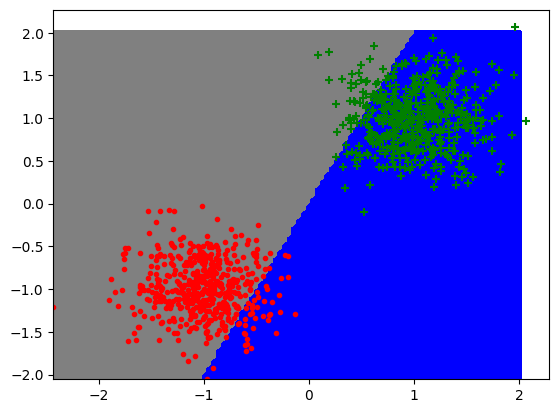

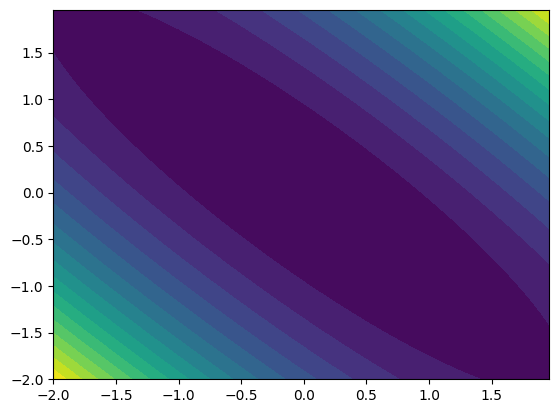

In [40]:
## Tirage d'un jeu de données aléatoire avec un bruit de 0.1
datax, datay = gen_arti(epsilon=0.1)
## Fabrication d'une grille de discrétisation pour la visualisation de la fonction de coût
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

plt.figure()
## Visualisation des données et de la frontière de décision pour un vecteur de poids w
w = np.random.randn(datax.shape[1], 1)
plot_frontiere(datax, lambda x: np.sign(x.dot(w)), step=100)
plot_data(datax, datay)

## Visualisation de la fonction de coût en 2D
plt.figure()
plt.contourf(
    x_grid,
    y_grid,
    np.array([mse(w, datax, datay).mean() for w in grid]).reshape(x_grid.shape),
    levels=20,
)

In [ ]:
def grad_check(f, f_grad, N=100):
    pass

In [93]:
def descente_gradient(x, y, f_loss, f_grad, eps, iter):
    liste_w = []  # liste des w
    losses = []  # valeurs de la fonction de coût
    w = np.random.randint(x.shape[1])
    for _ in range(iter):
        w = w - eps * f_grad(w, x, y).mean()
        losses.append(f_loss(w, x, y).mean())
        liste_w.append(w)
    return w, np.array(liste_w), np.array(losses)


def descente_gradient_sto(x, y, f_loss, f_grad, eps, iter):
    w = np.zeros(x.shape[1])  # init à 0
    liste_w = [w]
    losses =  []
    for i in range(iter):
        # tirage d'une donnée i
        i = np.random.randint(x.shape[0])
        # calcul du gradient
        w = w - eps * f_grad(w, x[i], y[i])
        losses.append(f_loss(w, x, y).mean())
        liste_w.append(w)
    return w, np.array(liste_w), np.array(losses)

In [89]:
datax.shape[0]

1000

In [83]:
datax, datay = gen_arti(data_type=1)

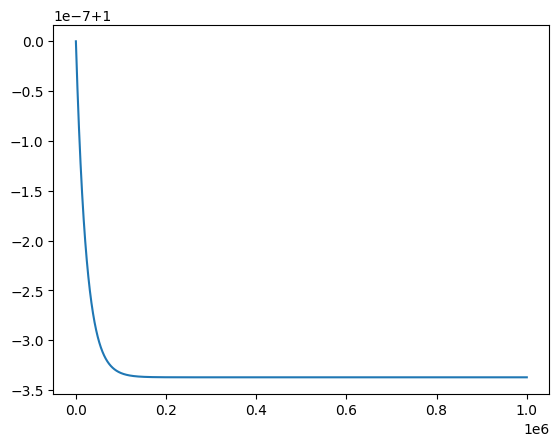

In [101]:
w, liste_w, losses = descente_gradient(datax, datay, mse, mse_grad, 1e-5, 1000000)
plt.plot(losses)

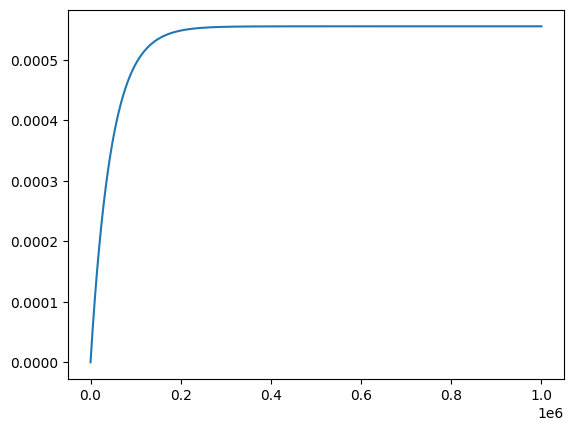

In [102]:
plt.plot(liste_w)

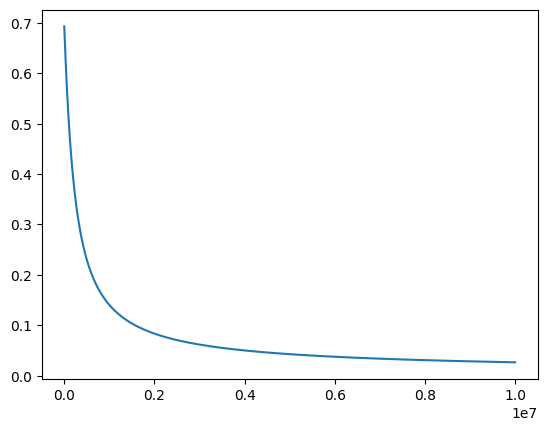

In [121]:
w, liste_w, losses = descente_gradient(datax, datay, reglog, reglog_grad, 1e-5, 10000000)
plt.plot(losses)